LAB 1, 05.03.2025


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris


Importowanie danych 


In [2]:
from sklearn.datasets import load_iris
irisRaw = load_iris()
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])
#tworzymy obiekt DataFrame z danych i etykiet iris i dodajemy nazwy kolumn 


Konwersja danych do pakiertu Pandas


Zad.1   Wyświetl dane i zapoznaj się z ich strukturą.


In [3]:
print("\r zad 1")

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
#zmieniamy opcje wyświetlania danych, aby wyświetlić wszystkie wiersze i kolumny 
print(iris)

print("\n Informacje o danych: ")
print(iris.info())


 zad 1
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.

Zad.2   Sprawdź liczbę wierszy oraz kolumn w zbiorze danych.



In [4]:
print(f"Liczba wiersz oraz kolumn {iris.shape}")


Liczba wiersz oraz kolumn (150, 5)


Zad.3   Wyświetl podstawowe statystyki opisowe dla każdej kolumny, korzystając z metody describe().

In [5]:
print(f"Podstawowe statystyki opisowe dla kazdej kolumny {iris.describe()}")
#count - liczba wierszy, mean - średnia, 
# std - odchylenie standardowe, min - minimalna wartość, 
# 25% - Wartość, poniżej której znajduje się 25% danych,
#  max - maksymalna wartość

Podstawowe statystyki opisowe dla kazdej kolumny        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


zad.4   Przeanalizuj działanie metody groupby() na dostępnych danych.



In [6]:


print("\n Grupowanie danych po wartościach sepal length i obliczenie średnich wartości pozostałych kolumn")
print(iris.groupby('petal length (cm)').mean())  # pogrupowanei po rownych wartościach petal length i  usredniee pozostalych wartosci )
 
print("\n Grupowanie danych po wartościach target i obliczenie sumy pozostałych kolumn")
print(iris.groupby('target').sum())



 Grupowanie danych po wartościach sepal length i obliczenie średnich wartości pozostałych kolumn
                   sepal length (cm)  sepal width (cm)  petal width (cm)  \
petal length (cm)                                                          
1.0                         4.600000          3.600000          0.200000   
1.1                         4.300000          3.000000          0.100000   
1.2                         5.400000          3.600000          0.200000   
1.3                         4.842857          3.228571          0.257143   
1.4                         4.915385          3.353846          0.207692   
1.5                         5.146154          3.569231          0.238462   
1.6                         4.914286          3.342857          0.285714   
1.7                         5.400000          3.600000          0.350000   
1.9                         4.950000          3.600000          0.300000   
3.0                         5.100000          2.500000          1.

zad.5   Wyświetl pierwsze 5 wierszy zbioru, korzystając z metody head().


In [7]:
print(iris.head(5))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


zad.6   Sprawdź, czy w zbiorze występują brakujące dane, używając metody dropna().


In [8]:
shape_iris = iris.shape
if iris.dropna().shape == shape_iris:
    print("Nie brakuje danych")
else:
    print("Są brakujące dane")

#iris.dropna() tworzy nowy DataFrame bez brakujących wartości.
#shape zwraca liczbę wierszy i kolumn.
#Jeśli kształt (rozmiar) oryginalnego DataFrame jest równy wersji bez braków, to znaczy, że nie ma brakujących danych.
#Jeśli rozmiar jest inny, to oznacza, że jakieś dane zostały usunięte, czyli są braki.

Nie brakuje danych


zad.7   Posortuj dane rosnąco względem drugiej kolumny, używając sort_values().


In [9]:
iris_sorted = iris.sort_values(by=iris.columns[1], ascending=True)  # Kolumna "sepal width"
print("\nDane posortowane według drugiej kolumny (sepal width):")
print(iris_sorted.head())
#Kod sortuje dane z ramki danych iris według wartości w drugiej kolumnie, czyli "sepal width", w kolejności rosnącej. Wynik sortowania 
# jest przypisywany do zmiennej iris_sorted. Następnie wyświetlane jest pięć pierwszych wierszy posortowanych danych za pomocą funkcji head().



Dane posortowane według drugiej kolumny (sepal width):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
60                 5.0               2.0                3.5               1.0   
62                 6.0               2.2                4.0               1.0   
119                6.0               2.2                5.0               1.5   
68                 6.2               2.2                4.5               1.5   
87                 6.3               2.3                4.4               1.3   

     target  
60      1.0  
62      1.0  
119     2.0  
68      1.0  
87      1.0  


zad.8   Znajdź minimalną i maksymalną wartość długości płatka (petal length - kolumna 3) oraz indeksy tych wartości (min(), idxmin()).


In [10]:
min_petal_length = iris.iloc[:, 2].min()  # Minimalna wartość dla "petal length"
max_petal_length = iris.iloc[:, 2].max()  # Maksymalna wartość dla "petal length"
min_index = iris.iloc[:, 2].idxmin()  # Indeks minimalnej wartości
max_index = iris.iloc[:, 2].idxmax()  # Indeks maksymalnej 
#iloc słuz do wybierania danych z DataFrame po indeksie



print(f"\nMinimalna wartość długości płatka: {min_petal_length}, indeks: {min_index}")
print(f"Maksymalna wartość długości płatka: {max_petal_length}, indeks: {max_index}")


Minimalna wartość długości płatka: 1.0, indeks: 22
Maksymalna wartość długości płatka: 6.9, indeks: 118


zad.9
Oblicz odchylenie standardowe (std) dla każdej kolumny.



In [11]:
std_devs = iris.std()  # Odchylenie standardowe dla wszystkich kolumn
print("\nOdchylenie standardowe dla każdej kolumny:")
print(std_devs)


Odchylenie standardowe dla każdej kolumny:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64


zad.10  Wyodrębnij wiersze, dla których długość kielicha (sepal length) jest większa od średniej wartości w zbiorze.


In [12]:
mean_sepal_length = iris['sepal length (cm)'].mean()  # Średnia długość sepal
print(f"Średnia długość sepal: {mean_sepal_length}")
iris_sepal_above_mean = iris[iris['sepal length (cm)'] > mean_sepal_length]  
#tworzy nowy DataFrame, który zawiera tylko 
# te wiersze, gdzie długość kielicha jest większa od tej średniej.
print("\nWiersze, gdzie długość kielicha (sepal length) jest większa od średniej:")
print(iris_sepal_above_mean)

#Kod najpierw oblicza średnią wartość dla kolumny "sepal length (cm)", a następnie  
# Na końcu wyświetla pierwsze pięć wierszy tego przefiltrowanego zbioru danych.

Średnia długość sepal: 5.843333333333334

Wiersze, gdzie długość kielicha (sepal length) jest większa od średniej:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                 7.0               3.2                4.7               1.4   
51                 6.4               3.2                4.5               1.5   
52                 6.9               3.1                4.9               1.5   
54                 6.5               2.8                4.6               1.5   
56                 6.3               3.3                4.7               1.6   
58                 6.6               2.9                4.6               1.3   
61                 5.9               3.0                4.2               1.5   
62                 6.0               2.2                4.0               1.0   
63                 6.1               2.9                4.7               1.4   
65                 6.7               3.1                4.4               1

zad.11  Wykonaj wykres słupkowy (barplot) przedstawiający średnią długość płatków dla każdej klasy kwiatu.

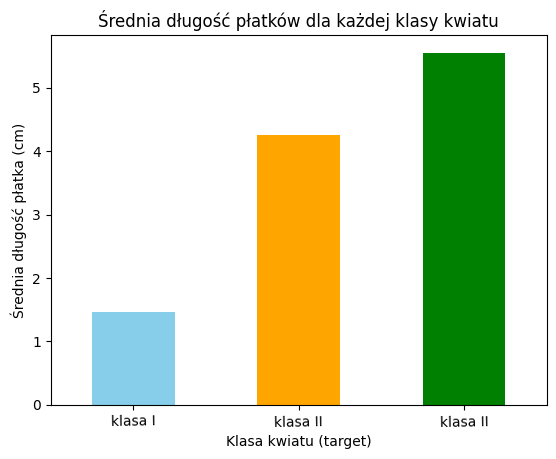

In [13]:
mean_petal_length_per_class = iris.groupby('target')['petal length (cm)'].mean() # Średnia długość płatków dla każdej klasy
mean_petal_length_per_class.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Średnia długość płatków dla każdej klasy kwiatu")
plt.xlabel("Klasa kwiatu (target)")
plt.ylabel("Średnia długość płatka (cm)")
plt.xticks(ticks=[0, 1, 2], labels=['klasa I', 'klasa II', 'klasa II'], rotation=1)
#ustawienie etykiet na osi x
plt.show()